# Bike Share Data Exploration
## Preliminary Wrangling

This document explores a dataset for time spent and distance covered by Capital bike riders.
It also includes exploration of other attributes of the bikes such as the type of bikes, the stations and  a few others.

In [1]:
# Import necessary packages and set plots to be embedded inline

import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import h3
import time

### Gathering Data

In [2]:
# Load all datasets with the glob library.

all_dataset = glob.glob("capital dataset/*.csv")

In [3]:
# Join all 12 datasets into one dataframe.

df  = pd.concat((pd.read_csv(f) for f in all_dataset), ignore_index=True)   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\concat.py:348: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


### Accessing Data

Visually and programmatically access data for quality and tidyness issues.

In [4]:
# Add show_counts parameter to show the non-null counts.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749881 entries, 0 to 2749880
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             2749881 non-null  object 
 1   rideable_type       2749881 non-null  object 
 2   started_at          2749881 non-null  object 
 3   ended_at            2749881 non-null  object 
 4   start_station_name  2553555 non-null  object 
 5   start_station_id    2553555 non-null  object 
 6   end_station_name    2530622 non-null  object 
 7   end_station_id      2530622 non-null  object 
 8   start_lat           2749879 non-null  float64
 9   start_lng           2749879 non-null  float64
 10  end_lat             2745078 non-null  float64
 11  end_lng             2745078 non-null  float64
 12  member_casual       2749881 non-null  object 
dtypes: float64(4), object(9)
memory usage: 272.7+ MB


In [5]:
# Check dataset for quality and tidyness issues.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,casual



#### Quality Issues

##### Missing values in the following columns:
- start_station_id
- start_station_name
- end_station_id
- end_station_name
- end_lat
- end_lng

##### Uppercase and Underscore in Values:
- uppercase and underscore in rideable_type and member_casual values.

##### Data type issues:
- The start_at and end_at variables are in string data type instead of datetime.
- rideable_type and member_casual are in string datatype instead of categorical data type.



##### Tidyness
- Column names should be renamed to names better to depict their values.

####  Other issues that were later discovered and fixed. 
- A column for distance covered in kilometer from the geolocation data should be created.
- Records with trip durations are less than 60 seconds are found in the dataset.
    - The dataset description says only records which trip durations are greater than 60 seconds should be considered.
- Outliers are found in the dataset.
    - Use descriptive Analysis to remove outliers.
- Records with zero kilometer(0km) in the dataset.
- Periods of the day should be created from the duration variable.
- A new column named time_spent should be created.

#### Define

##### Fix Missing values in the following columns:
- start_station_id
- start_station_name
- end_station_id
- end_station_name

- end_lat
- end_lng

### Cleaning Data

#### Note:
Since the missing values in the station names and id are not required for analysis, I will retain them.
However, I will remove every rows that contains null values for end latitude and longitude distance. This is because this two varriables will be required to calculate distance.

##### missing values in the end_lat and  end_lng.

#### Define
##### Fix missing values in the following columns.
- end_lat
- end_lng

#### Code

In [6]:
# Remove records with end_lat and end_lng column has null values

df = df[df.end_lat.notnull()]

#### Test

In [7]:
# Show dataset information.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745078 entries, 0 to 2749880
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             2745078 non-null  object 
 1   rideable_type       2745078 non-null  object 
 2   started_at          2745078 non-null  object 
 3   ended_at            2745078 non-null  object 
 4   start_station_name  2548752 non-null  object 
 5   start_station_id    2548752 non-null  object 
 6   end_station_name    2530620 non-null  object 
 7   end_station_id      2530620 non-null  object 
 8   start_lat           2745078 non-null  float64
 9   start_lng           2745078 non-null  float64
 10  end_lat             2745078 non-null  float64
 11  end_lng             2745078 non-null  float64
 12  member_casual       2745078 non-null  object 
dtypes: float64(4), object(9)
memory usage: 293.2+ MB


In [8]:
# Confirm that end_lat and end_lng has no null values

df.end_lat.isnull().sum(), df.end_lng.isnull().sum()

(0, 0)

##### Data type issues in the start_at and end_at column.

#### Define
##### Fix data type issues:
start_at and end_at variable are in string format. Convert them to datetime data type.

#### Code

In [9]:
# Convert to datetime datatype.

df["started_at"]  = pd.to_datetime(df["started_at"])
df["ended_at"]  = pd.to_datetime(df["ended_at"])

#### Test

In [10]:
# Check data information to confirm change.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745078 entries, 0 to 2749880
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             2745078 non-null  object        
 1   rideable_type       2745078 non-null  object        
 2   started_at          2745078 non-null  datetime64[ns]
 3   ended_at            2745078 non-null  datetime64[ns]
 4   start_station_name  2548752 non-null  object        
 5   start_station_id    2548752 non-null  object        
 6   end_station_name    2530620 non-null  object        
 7   end_station_id      2530620 non-null  object        
 8   start_lat           2745078 non-null  float64       
 9   start_lng           2745078 non-null  float64       
 10  end_lat             2745078 non-null  float64       
 11  end_lng             2745078 non-null  float64       
 12  member_casual       2745078 non-null  object        
dtypes: datetime6

##### Underscore  from rideable_type and member_casual columns
#### Define
 
- First remove Underscore  from rideable_type and member_casual columns .
- Then change the first letters of each word to uppercase.


#### Code

In [11]:
# Replace underscore with space in rideable_type column.

df.rideable_type = df.rideable_type.str.replace("_", " ")

In [12]:
# Change first letter to uppercase.

df.rideable_type = df.rideable_type.str.title()
df.member_casual = df.member_casual.str.title()

#### Test

In [13]:
# Confirm change.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,Classic Bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,Casual
1,CA68C580B32EEE66,Electric Bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,Member
2,5A925307814D5C2B,Classic Bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,Member
3,B6B2DB54A2B233EE,Classic Bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,Member
4,921A142D5C8A9759,Classic Bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,Casual


##### There should be a duration column from the difference of start time and end time.

#### Define
- Create a duration column from the difference of start time and end time.
- Create  a column

#### Code

In [14]:
# Get the time difference.

df["duration"] = df["ended_at"] - df["started_at"]

#### Test

In [15]:
# Print first five rows to confirm new column.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,13A48BD20CC3DD85,Classic Bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,Casual,0 days 00:26:35
1,CA68C580B32EEE66,Electric Bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,Member,0 days 00:18:01
2,5A925307814D5C2B,Classic Bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,Member,0 days 00:02:53
3,B6B2DB54A2B233EE,Classic Bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,Member,0 days 00:14:24
4,921A142D5C8A9759,Classic Bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,Casual,0 days 00:10:30


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745078 entries, 0 to 2749880
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  duration            timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), object(7), timedelta64[ns](1)
memory usage: 314.1+ MB


##### A column for distance covered in kilometer from the geolocation data should be created.

#### Define
Create a column for distance covered in kilometer from the geolocation data(latitude and longitude).

#### Code

- First import the h3 library to caculate the distance covered between the start location and end location. The result should be in kilometer(km).
- Store the result in a new column named duration in the dataframe.

In [17]:
# Use the h3 library to caculate the distance covered between the start location and end location.

df["distance"] = df.apply(lambda x: h3.point_dist(( x["start_lat"], x["start_lng"] ), ( x["end_lat"], x["end_lng"] ), unit="km"), axis=1)

#### Test

In [18]:
# Show the first five rows to confirm creation of the duration column.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance
0,13A48BD20CC3DD85,Classic Bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,Casual,0 days 00:26:35,3.279164
1,CA68C580B32EEE66,Electric Bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,Member,0 days 00:18:01,3.422112
2,5A925307814D5C2B,Classic Bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,Member,0 days 00:02:53,0.535473
3,B6B2DB54A2B233EE,Classic Bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,Member,0 days 00:14:24,1.862818
4,921A142D5C8A9759,Classic Bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,Casual,0 days 00:10:30,0.780900


#### Only Records which trip durations are greater than 60 seconds should be considered.
#### Define
The data description says any trip less than 60 seconds are trips taken by staff as they service and test the bikes.
This kind of records should be excluded from the dataset.

Only consider records which trip durations are greater than 60 seconds.

#### Code


In [19]:
# Take the records whose trips durations are greater than 60 seconds and store in df.

df  = df[df["duration"].dt.total_seconds() > 60]

#### Test


In [20]:
# Confirm that  trips less than 60 seconds have been excluded from the dataset.

(df["duration"].dt.total_seconds() < 60).sum()

0

In [21]:
# Show data information for trips greater than 60 seconds.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707258 entries, 0 to 2749880
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   ride_id             2707258 non-null  object         
 1   rideable_type       2707258 non-null  object         
 2   started_at          2707258 non-null  datetime64[ns] 
 3   ended_at            2707258 non-null  datetime64[ns] 
 4   start_station_name  2517625 non-null  object         
 5   start_station_id    2517625 non-null  object         
 6   end_station_name    2501823 non-null  object         
 7   end_station_id      2501823 non-null  object         
 8   start_lat           2707258 non-null  float64        
 9   start_lng           2707258 non-null  float64        
 10  end_lat             2707258 non-null  float64        
 11  end_lng             2707258 non-null  float64        
 12  member_casual       2707258 non-null  object         
 1

#### Descriptive Analysis to remove outliers.

#### Define
##### Use descriptive analysis to to exclude outliers from the dataset.


- First plot the duration column on a histogram to view the distribution of data. If the data are normally distributed, use the z-score method to remove outliers. However, if the distribution is skewed, use the interquartile range method to remove ouliers from the dataset.

#### Code

In [22]:
# Check statical summary of data.

df.describe()

,start_lat,start_lng,end_lat,end_lng,duration,distance
count,2.707258e+06,2.707258e+06,2.707258e+06,2.707258e+06,2707258,2.707258e+06
mean,3.890350e+01,-7.703195e+01,3.890250e+01,-7.703161e+01,0 days 00:23:33.320030451,1.913776e+00
std,2.704215e-02,3.309000e-02,2.678181e-02,3.293429e-02,0 days 03:30:15.300969278,1.525139e+00
min,3.878000e+01,-7.739000e+01,3.844000e+01,-7.756000e+01,0 days 00:01:00,0.000000e+00
25%,3.889050e+01,-7.704513e+01,3.889050e+01,-7.704500e+01,0 days 00:07:21,9.034285e-01
50%,3.890273e+01,-7.703189e+01,3.890239e+01,-7.703188e+01,0 days 00:12:41,1.568769e+00
75%,3.891540e+01,-7.701392e+01,3.891265e+01,-7.701381e+01,0 days 00:21:59,2.556769e+00
max,3.913000e+01,-7.682000e+01,3.918000e+01,-7.680000e+01,37 days 21:00:28,5.257394e+01


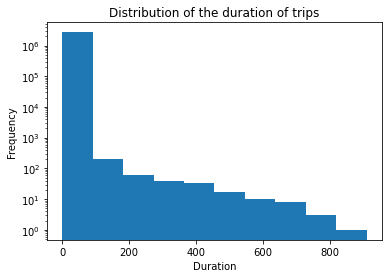

In [23]:
# Distribution of data on a histogram.

plt.hist(df["duration"].dt.total_seconds()/3600)
plt.title("Distribution of the duration of trips")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.yscale("log")

####  Observation
Since the trip duration  is skewed to the right. The Quartile Method will be used to remove outliers.

##### Steps taken to remove outliers
- Use the interquartile method to exclude outliers from the dataset.
- First, Find the Lower and Upper Quartile value from the duration column.
- Use the values to determine the interquartile range(IQR)
- Find the maximum and minimum values from the above data.
- Use the maximum and minimum values to remove the outliers from the dataset.


In [24]:
# Find Lower quartile
lower_quartile = df["duration"].quantile(0.25)
lower_quartile

Timedelta('0 days 00:07:21')

In [25]:
# Find upper quartile

upper_quartile = df["duration"].quantile(0.75)
upper_quartile

Timedelta('0 days 00:21:59')

In [26]:
# Find the interquartile range of the duration data.

iqr = upper_quartile - lower_quartile
iqr

Timedelta('0 days 00:14:38')

In [27]:
# Find maximum values

max_value = upper_quartile + 1.5 *(iqr)
max_value

Timedelta('0 days 00:43:56')

In [28]:
# Find minimum values

min_value = lower_quartile - 1.5 *(iqr)
min_value

Timedelta('-1 days +23:45:24')

In [29]:
# Find total number of duration outliers in the dataset.

((df["duration"] < min_value) | (df["duration"] > max_value)).sum()

222526

In [30]:
# Total number of records without outlier.

((df["duration"] >= min_value) & (df["duration"] <= max_value)).sum()

2484732

In [31]:
# Take the data after ouliers have been removed and store in  df.
df = df[((df["duration"] >= min_value) & (df["duration"] <= max_value))]

#### Test

In [32]:
# Check datset information to confirm change.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484732 entries, 0 to 2749880
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   ride_id             2484732 non-null  object         
 1   rideable_type       2484732 non-null  object         
 2   started_at          2484732 non-null  datetime64[ns] 
 3   ended_at            2484732 non-null  datetime64[ns] 
 4   start_station_name  2308469 non-null  object         
 5   start_station_id    2308469 non-null  object         
 6   end_station_name    2298346 non-null  object         
 7   end_station_id      2298346 non-null  object         
 8   start_lat           2484732 non-null  float64        
 9   start_lng           2484732 non-null  float64        
 10  end_lat             2484732 non-null  float64        
 11  end_lng             2484732 non-null  float64        
 12  member_casual       2484732 non-null  object         
 1

In [33]:
# Check statistical summary of the data.

df.describe()

,start_lat,start_lng,end_lat,end_lng,duration,distance
count,2.484732e+06,2.484732e+06,2.484732e+06,2.484732e+06,2484732,2.484732e+06
mean,3.890403e+01,-7.703146e+01,3.890305e+01,-7.703113e+01,0 days 00:13:54.804936709,1.889741e+00
std,2.626586e-02,3.244064e-02,2.598851e-02,3.227332e-02,0 days 00:09:02.201630946,1.363988e+00
min,3.878000e+01,-7.739000e+01,3.876000e+01,-7.739000e+01,0 days 00:01:00,0.000000e+00
25%,3.889061e+01,-7.704478e+01,3.889054e+01,-7.704478e+01,0 days 00:06:58,9.375047e-01
50%,3.890358e+01,-7.703174e+01,3.890267e+01,-7.703169e+01,0 days 00:11:39,1.583816e+00
75%,3.891546e+01,-7.701350e+01,3.891272e+01,-7.701272e+01,0 days 00:18:56,2.524655e+00
max,3.913000e+01,-7.682000e+01,3.918000e+01,-7.681000e+01,0 days 00:43:56,1.703296e+01


##### Records with zero kilometer(0km) in the dataset.
####  Define
From the above statistical summary, I found that there are records with zero kilometer(0km).
I will check the total number of such records in the cell below.

#### Code

In [34]:
# Total number of records with a distance of 0 kilometer.

(df["distance"] == 0).sum()

107974

In [35]:
# A visual look at records with 0 km.
df[(df["distance"] == 0)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance
34,8E8CB7CED65468F3,Classic Bike,2021-01-06 17:48:57,2021-01-06 18:28:01,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,38.846270,-76.981850,38.846270,-76.981850,Casual,0 days 00:39:04,0.0
35,A5B6BEA72452D7E6,Classic Bike,2021-01-06 12:50:47,2021-01-06 13:26:53,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,38.846270,-76.981850,38.846270,-76.981850,Casual,0 days 00:36:06,0.0
36,C5E746B32F7E7C82,Classic Bike,2021-01-08 14:28:57,2021-01-08 14:47:11,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,Alabama Ave & Stanton Rd SE / Shops at Park Vi...,31813.0,38.846270,-76.981850,38.846270,-76.981850,Casual,0 days 00:18:14,0.0
70,FE693AAA916B41EF,Classic Bike,2021-01-07 18:48:34,2021-01-07 19:06:49,Montello Ave & Holbrook Terr NE,31524.0,Montello Ave & Holbrook Terr NE,31524.0,38.907444,-76.986813,38.907444,-76.986813,Member,0 days 00:18:15,0.0
81,A38C79D0946F699D,Docked Bike,2021-01-06 15:44:31,2021-01-06 15:51:56,21st St & Pennsylvania Ave NW,31252.0,21st St & Pennsylvania Ave NW,31252.0,38.901539,-77.046564,38.901539,-77.046564,Casual,0 days 00:07:25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749689,BE34B73F4829E95D,Classic Bike,2021-12-30 12:13:50,2021-12-30 12:24:17,14th & Irving St NW,31124.0,14th & Irving St NW,31124.0,38.928552,-77.032224,38.928552,-77.032224,Member,0 days 00:10:27,0.0
2749691,5B85AF3E2EA60B61,Docked Bike,2021-12-11 14:35:56,2021-12-11 14:38:49,15th St & Pennsylvania Ave NW,31129.0,15th St & Pennsylvania Ave NW,31129.0,38.896465,-77.033381,38.896465,-77.033381,Casual,0 days 00:02:53,0.0
2749788,543DDEEC7DA8DB75,Classic Bike,2021-12-20 11:27:50,2021-12-20 11:40:48,14th & Rhode Island Ave NW,31203.0,14th & Rhode Island Ave NW,31203.0,38.908600,-77.032300,38.908600,-77.032300,Member,0 days 00:12:58,0.0
2749789,758AFE03C7EF09AC,Docked Bike,2021-12-03 22:32:50,2021-12-03 22:52:33,15th St & Pennsylvania Ave NW,31129.0,15th St & Pennsylvania Ave NW,31129.0,38.896465,-77.033381,38.896465,-77.033381,Casual,0 days 00:19:43,0.0


#### Note:
A visual accessement of the data above shows that the start and end latitude and longitude are the same. There is no change between geographical data. This further confirms that the bikes covered no distance. They are probably at a spot. Those might be bikes that are being serviced by the staff.

In [36]:
# Total number of records with distance greater than 0 kilometer.

(df["distance"] != 0).sum()

2376758

In [37]:
# Dataframe with records above 0km.

df = df[df["distance"] != 0]

#### Test

In [38]:
# Check dataset information to confirm change.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376758 entries, 0 to 2749878
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   ride_id             2376758 non-null  object         
 1   rideable_type       2376758 non-null  object         
 2   started_at          2376758 non-null  datetime64[ns] 
 3   ended_at            2376758 non-null  datetime64[ns] 
 4   start_station_name  2220856 non-null  object         
 5   start_station_id    2220856 non-null  object         
 6   end_station_name    2210733 non-null  object         
 7   end_station_id      2210733 non-null  object         
 8   start_lat           2376758 non-null  float64        
 9   start_lng           2376758 non-null  float64        
 10  end_lat             2376758 non-null  float64        
 11  end_lng             2376758 non-null  float64        
 12  member_casual       2376758 non-null  object         
 1

In [39]:
# Check statical summary of data.

df.describe()

,start_lat,start_lng,end_lat,end_lng,duration,distance
count,2.376758e+06,2.376758e+06,2.376758e+06,2.376758e+06,2376758,2.376758e+06
mean,3.890417e+01,-7.703129e+01,3.890315e+01,-7.703094e+01,0 days 00:13:46.651036411,1.975590e+00
std,2.522670e-02,3.120436e-02,2.492925e-02,3.102042e-02,0 days 00:08:49.370278275,1.332434e+00
min,3.878000e+01,-7.739000e+01,3.876000e+01,-7.739000e+01,0 days 00:01:00,1.026487e-04
25%,3.889224e+01,-7.704463e+01,3.889086e+01,-7.704470e+01,0 days 00:07:01,1.026474e+00
50%,3.890366e+01,-7.703174e+01,3.890276e+01,-7.703169e+01,0 days 00:11:34,1.654574e+00
75%,3.891550e+01,-7.701377e+01,3.891272e+01,-7.701281e+01,0 days 00:18:37,2.586542e+00
max,3.913000e+01,-7.682000e+01,3.918000e+01,-7.681000e+01,0 days 00:43:56,1.703296e+01


##### Periods of the day should be created from the duration variable.
#### Define

Create a session column that shows the time period of the day the trip was started.

#### Code

In [40]:
# Show first five rows to view column headers.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance
0,13A48BD20CC3DD85,Classic Bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,Casual,0 days 00:26:35,3.279164
1,CA68C580B32EEE66,Electric Bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,Member,0 days 00:18:01,3.422112
2,5A925307814D5C2B,Classic Bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,Member,0 days 00:02:53,0.535473
3,B6B2DB54A2B233EE,Classic Bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,Member,0 days 00:14:24,1.862818
4,921A142D5C8A9759,Classic Bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,Casual,0 days 00:10:30,0.780900


In [41]:
# The starting time in hour.

hourly_time = df["started_at"].dt.hour

In [42]:
# Session column for trips created.

bin = [ 0, 4, 8, 12, 16, 20,  24]
label  = ["Late Night", "Early Morning", "Morning", "Afternoon", "Evening", "Night"]
df["session"] =  pd.cut(hourly_time, bins=bin, labels=label, include_lowest=True)

#### Test

In [43]:
# Show first five rows to confirm the created session column.

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,distance,session
0,13A48BD20CC3DD85,Classic Bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,Casual,0 days 00:26:35,3.279164,Evening
1,CA68C580B32EEE66,Electric Bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.0,14th & D St SE,31663.0,38.894804,-77.023091,38.884053,-76.986043,Member,0 days 00:18:01,3.422112,Night
2,5A925307814D5C2B,Classic Bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.0,George Mason Dr & Wilson Blvd,31036.0,38.879477,-77.114563,38.878870,-77.120700,Member,0 days 00:02:53,0.535473,Evening
3,B6B2DB54A2B233EE,Classic Bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.0,Braddock Rd Metro,31047.0,38.798133,-77.048700,38.814577,-77.052808,Member,0 days 00:14:24,1.862818,Morning
4,921A142D5C8A9759,Classic Bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.0,Braddock Rd Metro,31047.0,38.814185,-77.043809,38.814577,-77.052808,Casual,0 days 00:10:30,0.780900,Morning


In [44]:
# Show dataset information.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376758 entries, 0 to 2749878
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   ride_id             2376758 non-null  object         
 1   rideable_type       2376758 non-null  object         
 2   started_at          2376758 non-null  datetime64[ns] 
 3   ended_at            2376758 non-null  datetime64[ns] 
 4   start_station_name  2220856 non-null  object         
 5   start_station_id    2220856 non-null  object         
 6   end_station_name    2210733 non-null  object         
 7   end_station_id      2210733 non-null  object         
 8   start_lat           2376758 non-null  float64        
 9   start_lng           2376758 non-null  float64        
 10  end_lat             2376758 non-null  float64        
 11  end_lng             2376758 non-null  float64        
 12  member_casual       2376758 non-null  object         
 1

##### Rename column names.

#### Define
Rename column names that are hard to understand to more relatable names.

#### Code

In [45]:
# Rename column names.

df.rename(columns={"rideable_type": "bike_type", "start_station_name":"departure_station", 
                   "end_station_name":"destination_station", "member_casual":"rider_status"}, inplace=True)

#### Test

In [46]:
# Show one row to confirm change in renamed column names.

df.head(1)

,ride_id,bike_type,started_at,ended_at,departure_station,start_station_id,destination_station,end_station_id,start_lat,start_lng,end_lat,end_lng,rider_status,duration,distance,session
0,13A48BD20CC3DD85,Classic Bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.0,Georgia Ave & Emerson St NW,31405.0,38.947156,-77.065115,38.949662,-77.027333,Casual,0 days 00:26:35,3.279164,Evening


#####  Create a new column named time_spent

#### Define
Create a new column named time_spent. It would be difference between start time and end time. The column will be in minute.


#### Code

In [47]:
# Create a new column named time_spent. It is the time spent per trip in minutes.

df["time_spent"]= df.duration.dt.total_seconds()/60

#### Test

In [48]:
# Confirm change.

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376758 entries, 0 to 2749878
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   ride_id              2376758 non-null  object         
 1   bike_type            2376758 non-null  object         
 2   started_at           2376758 non-null  datetime64[ns] 
 3   ended_at             2376758 non-null  datetime64[ns] 
 4   departure_station    2220856 non-null  object         
 5   start_station_id     2220856 non-null  object         
 6   destination_station  2210733 non-null  object         
 7   end_station_id       2210733 non-null  object         
 8   start_lat            2376758 non-null  float64        
 9   start_lng            2376758 non-null  float64        
 10  end_lat              2376758 non-null  float64        
 11  end_lng              2376758 non-null  float64        
 12  rider_status         2376758 non-null  obj

##### Some columns are irrelevant for data exploration.

#### Define
Take only columns that will be useful for exploration and store in a new variable called bike.

#### Code

In [49]:
# Take the relevant columns and store in a new variable called bike.

bike = df[["bike_type", "rider_status", "distance", "duration", "time_spent", "session", "started_at", "ended_at", "departure_station", 
    "destination_station"]]

#### Test

In [50]:
# Confirm data information.

bike.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376758 entries, 0 to 2749878
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   bike_type            2376758 non-null  object         
 1   rider_status         2376758 non-null  object         
 2   distance             2376758 non-null  float64        
 3   duration             2376758 non-null  timedelta64[ns]
 4   time_spent           2376758 non-null  float64        
 5   session              2376758 non-null  category       
 6   started_at           2376758 non-null  datetime64[ns] 
 7   ended_at             2376758 non-null  datetime64[ns] 
 8   departure_station    2220856 non-null  object         
 9   destination_station  2210733 non-null  object         
dtypes: category(1), datetime64[ns](2), float64(2), object(4), timedelta64[ns](1)
memory usage: 183.6+ MB


### What is the structure of your dataset?

This dataset contains records about the trips of bikes from capitalbikeshare.
There are over 2.3 million records after the cleaned dataset.

After cleaning, there are 10 variables remaining listed below:

- bike_type
- rider_status
- distance
- duration
- session
- started_at
- ended_at
- departure_station
- destination_station
- time_spent


The dataset is a mix of float, datetime, timedelta and string data type.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in finding out the features that are best in predicting the duration of trip and distance covered by bike riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the distance covered by bike riders to have the strongest correlation with the duration of trip.
I will explore other categorical variables to check their relationship with one another. I will explore their relationship with duration and distance.


## Univariate Exploration
I will start this exploration by looking at the main variable of interest: duration

<Figure size 576x360 with 0 Axes>

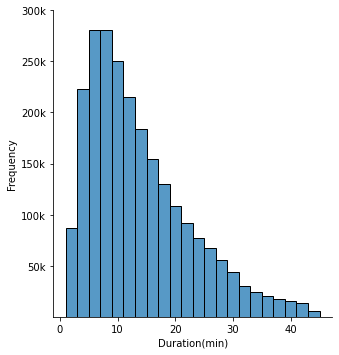

In [51]:
# An histogram showing the distribution of the duration of trips in minutes.

yticks = [5e4, 1e5, 1.5e5, 2e5, 2.5e5, 3e5]
ytick_label = ["50k", "100k", "150k", "200k", "250k", "300k"]
plt.figure(figsize=(8,5))
bins = np.arange(1, bike.time_spent.max()+2, 2)


sb.displot(data=bike, x="time_spent",  bins=bins,kde=False)
plt.xlabel("Duration(min)")
plt.ylabel("Frequency")
plt.yticks(yticks, ytick_label)
plt.show()

#### Observation:

The histogram is unimodal and skewed to the right. This means higher values of trip duration are not so common with bike riders. Only few riders spent 30 minutes and above on their trip when compared to the volume of the dataset.

The bars increases progressively from 1 minute until it gets to 6 to 8 minutes.

The most popular minutes spent by bike riders is around 6 to 8 minutes. They have the highest number of appearances in the dataset. About 300,000 bike riders spent 6 to 8 minutes on their rides.

As the highest number of trip duration peaked at 6 to 8 minutes, it began to fall progressively till around 43 minutes.
Next, I will look at the distribution of distance on histogram.


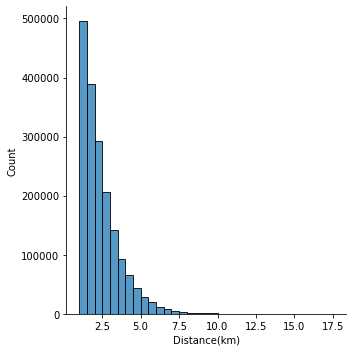

In [52]:
# An histogram showing the distribution of the distance covered by bike riders in kilometers.

bins = np.arange(1, bike.distance.max()+0.5, 0.5)
sb.displot(data= bike, x= "distance", bins=bins)
plt.xlabel("Distance(km)")
plt.show()


In [53]:
# Statistical summary of the distance variable.

bike.distance.describe()

count    2.376758e+06
mean     1.975590e+00
std      1.332434e+00
min      1.026487e-04
25%      1.026474e+00
50%      1.654574e+00
75%      2.586542e+00
max      1.703296e+01
Name: distance, dtype: float64

In [54]:
# Statistical summary of the logarithm of distance variable.

np.log10(bike.distance).describe()

count    2.376758e+06
mean     1.955852e-01
std      3.279441e-01
min     -3.988647e+00
25%      1.134794e-02
50%      2.186861e-01
75%      4.127195e-01
max      1.231290e+00
Name: distance, dtype: float64

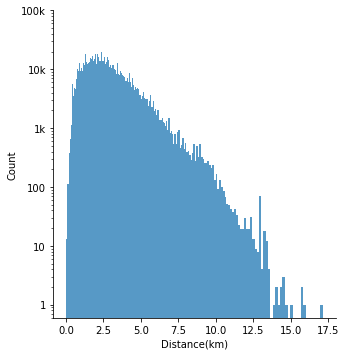

In [55]:
# There is a long-tail in the distance distribution above. I will put it on a log scale.

binsize = 0.005

yticks = [1, 10, 100, 1e3, 1e4, 1e5]
ytick_label = ["1", "10", "100", "1k", "10k", "100k"]

bins = 10 ** np.arange(-3, np.log10(bike.distance).max()+binsize, binsize)
sb.displot(data= bike, x= "distance", bins=bins)
plt.yscale("log")
plt.xlabel("Distance(km)")
plt.yticks(yticks, ytick_label)
#plt.xlim(10**-1, 10**1)
plt.show()

#### Observation:

From the distribution without the log scale, the distance is skewed to the right. This means that a few number of bike riders covered high distance in the dataset.
I also notice that as the distance increases, the frequency decreases. Similar situation can be seen from the log-scale distribution. log transformation is used on the y axis and a very small bin size is used. This is to make the few number of values after 13 kilometers more visible. The log transformation distribution is also skewed to the left.
The frequency of the distance increased drastically from the minimum till around 2.5 kilometer before taking a deep dive to the downside.

Unusually, I find that there are a lot of distance values around 0  to 0. 1 kilometer.
This must require some cleaning. I will go ahead to look out for where the problem lies.


In [56]:
# Distance statistical summary.

bike.distance.describe()

count    2.376758e+06
mean     1.975590e+00
std      1.332434e+00
min      1.026487e-04
25%      1.026474e+00
50%      1.654574e+00
75%      2.586542e+00
max      1.703296e+01
Name: distance, dtype: float64

#### Note:
I can see from the result from the statistical summary above that there is a distance as low as 0.0001km, an equivalalent of 0.1 meter. That is not the kind of value I would expect for a trip. There must be a problem somewhere in the dataset. I would expect a bike to cover an hundred meter distance or close at the minimum.
I will go ahead to randomly view the characteristics of record of data with less than 100 meter distance.

In [57]:
# Sum of distances less than 0.1km(100m).

(bike.distance < 0.1).sum()

8853

In [58]:
# A visual look at the records of distances below 0.1km(100m).

bike[bike.distance < 0.1].sample(100)

,bike_type,rider_status,distance,duration,time_spent,session,started_at,ended_at,departure_station,destination_station
513433,Electric Bike,Member,0.026163,0 days 00:26:32,26.533333,Morning,2021-04-16 12:30:19,2021-04-16 12:56:51,14th & Otis Pl NW,14th & Otis Pl NW
2070349,Electric Bike,Casual,0.010412,0 days 00:33:28,33.466667,Morning,2021-10-12 11:49:23,2021-10-12 12:22:51,M St & New Jersey Ave SE,M St & New Jersey Ave SE
1559408,Electric Bike,Casual,0.008812,0 days 00:26:03,26.050000,Morning,2021-08-03 10:27:23,2021-08-03 10:53:26,Largo Rd & Campus Way / Prince Georges's Comm Col,Largo Rd & Campus Way / Prince Georges's Comm Col
895143,Electric Bike,Member,0.008942,0 days 00:40:18,40.300000,Night,2021-06-29 21:10:46,2021-06-29 21:51:04,Lamont & Mt Pleasant NW,Lamont & Mt Pleasant NW
1023096,Electric Bike,Member,0.011358,0 days 00:11:22,11.366667,Evening,2021-06-05 19:32:45,2021-06-05 19:44:07,4th & M St SW,4th & M St SW
...,...,...,...,...,...,...,...,...,...,...
1784160,Electric Bike,Member,0.003773,0 days 00:04:20,4.333333,Evening,2021-09-11 17:11:58,2021-09-11 17:16:18,15th & W St NW,15th & W St NW
386498,Electric Bike,Casual,0.003548,0 days 00:24:22,24.366667,Afternoon,2021-04-25 16:09:20,2021-04-25 16:33:42,15th St & Constitution Ave NW,15th St & Constitution Ave NW
2556652,Electric Bike,Member,0.011196,0 days 00:15:51,15.850000,Afternoon,2021-11-09 13:25:35,2021-11-09 13:41:26,Court House Metro / 15th St & N Uhle St,Court House Metro / 15th St & N Uhle St
1673463,Electric Bike,Casual,0.023898,0 days 00:04:27,4.450000,Night,2021-08-28 23:32:40,2021-08-28 23:37:07,14th & V St NW,14th & V St NW


#### Observation:

There are about 9,000 records with distances less than 100 meter in the dataset.

By randomly taking a look at the characteristic of the sample, I found that records with less than 100 meter  has the same departure and destination station. I can't tell why this happened. Unexpectedly, the duration values are greater than 1 minutes.  One situation is that the bike riders might have been delayed at the start staion due to weather condition and never left the station after signing up for their ride. Another situation is the case of staff servicing the bike. It might also have been an error issue. In all, I cannot accertain why this occur. I wish I could explore further to know why this anomaly occur. The weather data might have given an insight to this anomaly. But, unfortunately, I couldn't lay my hand on the weather data.
I will exclude those records from the dataset. 


Take the following step to exclude those kind of records:

- First, I will go ahead to check the total number of records with the same departure and destination station.
- Secondly, I will remove all data records whose distance are less than 100 meter(0.1 kilometer).
- Lastly, I will then check if there is a drastic reduction in the number of records whose departure and destination station are the same after removing records with less than 100 meter.

In [59]:
# check the total number of records with the same departure and destination station.

(bike["departure_station"] == bike["destination_station"]).sum()

8386

#### Observation:
There are over 8,000 records with the same departure and destination station. 

I will remove all data records whose distance are less than 100 meter and then confirm if there is a drastic reduction in this number.

In [60]:
# Remove all data records whose distance are less than 100 meter.

bike = bike[bike.distance > 0.1]

In [61]:
# check if there is a drastic reduction in the 
# number of records with the same departure and destination station.

(bike["departure_station"] == bike["destination_station"]).sum()

38

#### Observation:
Incredibly, the number reduced from about 9,000 to 38 records. 
Obviously, records with trips less than 100 meter contains most of the records with the same departure and destination station.


I only want to explore the data where bike riders rode from one station to another.
Isn't it possible for the riders to return the bike to the departure station after their trips?
Of course, it's possible. But, in such situations it only make sense that the distance covered should be above few meters not values found in the dataset that are as low as 0.1meter(10cm).

On this note, I will remove the remaining records with the same departure and destination station.

In [62]:
# Remove the remaining records with the same departure and destination station.

bike = bike[bike["departure_station"] != bike["destination_station"]]

In [63]:
# Show data information to confirm change.

bike.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2367867 entries, 0 to 2749878
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   bike_type            2367867 non-null  object         
 1   rider_status         2367867 non-null  object         
 2   distance             2367867 non-null  float64        
 3   duration             2367867 non-null  timedelta64[ns]
 4   time_spent           2367867 non-null  float64        
 5   session              2367867 non-null  category       
 6   started_at           2367867 non-null  datetime64[ns] 
 7   ended_at             2367867 non-null  datetime64[ns] 
 8   departure_station    2212041 non-null  object         
 9   destination_station  2202005 non-null  object         
dtypes: category(1), datetime64[ns](2), float64(2), object(4), timedelta64[ns](1)
memory usage: 182.9+ MB


In [64]:
# This code updates the dataset with all the columns the former dataset.
# I didn't want to drop it because exploration might demand that some of its variable are needed.

df = df[df["departure_station"] != df["destination_station"]]
df = df[df.distance > 0.1]

#### Observation:
Now, that I have cleaned the data from records with less than 100 meter distance and trips with the same departure and destination station. I will go ahead and re-plot the histogram of the distribution of histogram and see if there is no difference.

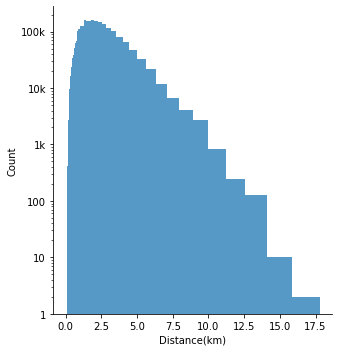

In [65]:
# The distribution of distance after cleaning was done. I will put it on a log scale.

binsize = 0.05

yticks = [1, 10, 100, 1e3, 1e4, 1e5]
ytick_label = ["1", "10", "100", "1k", "10k", "100k"]

bins = 10 ** np.arange(-3, np.log10(bike.distance).max()+binsize, binsize)
sb.displot(data= bike, x= "distance", bins=bins)
plt.yscale("log")
plt.xlabel("Distance(km)")
plt.yticks(yticks, ytick_label)
#plt.xlim(10**-1, 10**1)
plt.show()

#### Observation:

It is not surprising that there is no feasible difference in this distribution from the last one. The excluded 9000 records is very minute for dataset that has over 2.3 million records.
But, after I changed the bin size. I find that the most common trips with bike riders are around 2.5 kilometer. That's where the mode lies. After that, the frequency began to fall drastically like one walking down the staircase.
The chart implies a negative correlation. As the distance increases, their frequency decreases.

I will now move on to explore categorical variables found in the dataset.
I will start with the bike type variable next. After that, I will move to next ones.

In [66]:
# This is the default color that will be used to color the charts.
# It will be used severally in this exploration.

base_color = sb.color_palette()[0]

In [67]:
# Total number of rows.

n_bike = bike.shape[0]

In [68]:
# Valuecounts of the bike_type.

bike_type_count = bike.bike_type.value_counts()
bike_type_count

# maximum valuecounts of the bike_type.

max_bike_type = bike_type_count[0]
max_bike_type

# Proportion of the highest value.

max_bike_type_prop = max_bike_type/ n_bike
max_bike_type_prop



0.7630061147860079

#### Note:
Create a function to perform the task in the preceeding cell. It will be helpful for determing proportions for other charts.

In [69]:
# A Function finding the proportion of the data with the maximum value in a column.

def proportion(dataframe,column):
        """ Find the proportion of the data with the maximum occurence in a column. """
        return column.value_counts()[0] / dataframe.shape[0]

In [70]:
# Call the proportion function.
max_bike_type_prop = proportion(bike, bike["bike_type"])
max_bike_type_prop

0.7630061147860079

In [71]:
# Tick names.

ticks = np.round(np.arange(0, max_bike_type_prop, 0.1), 2)

tick_name = (ticks * 100).astype("int")
tick_name

array([ 0, 10, 20, 30, 40, 50, 60, 70])

In [72]:
# ytick location.

yticks = n_bike * ticks
yticks

array([      0. ,  236786.7,  473573.4,  710360.1,  947146.8, 1183933.5,
       1420720.2, 1657506.9])

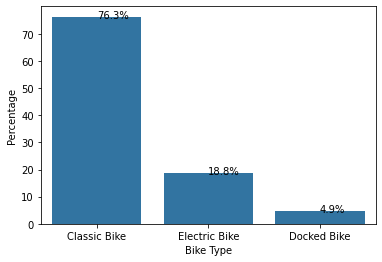

In [73]:
# Bar chart showing the popularity of bike types among bike riders.


bike_type_bar = sb.countplot(data=bike, x="bike_type", color=base_color)
plt.yticks(yticks, tick_name)
plt.xlabel("Bike Type")
plt.ylabel("Percentage")
for i in range(len(bike_type_count)):
    count = bike_type_count[i]
    label = "{:0.1f}%".format(100 * count/n_bike)
    plt.text(i, count+10000,  label, va="center")


plt.show()


#### Observation:
From the chart above, I found that Classic bikes are the most preferred bikes among bike riders. They are the most popular bikes. 76 percent of bike riders ride classic bikes.
While docked bikes are the least popular bikes among bike riders.
This implies that most of the riders ride classic bikes and they ride docked bikes the least.
Next, I will move on to explore the most popular and unpopular stations among bike riders.

In [74]:
# Top five most popular stations.

top_station = bike.departure_station.value_counts().head()
top_station

New Hampshire Ave & T St NW        26561
15th & P St NW                     25106
1st & M St NE                      23116
Lincoln Memorial                   19940
Columbus Circle / Union Station    19555
Name: departure_station, dtype: int64

In [75]:
# Functions to add title and labels to chart.

def polish_chart(plt, title, xlabel, ylabel):
    """ Adds title and labels to chart. """
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.show()

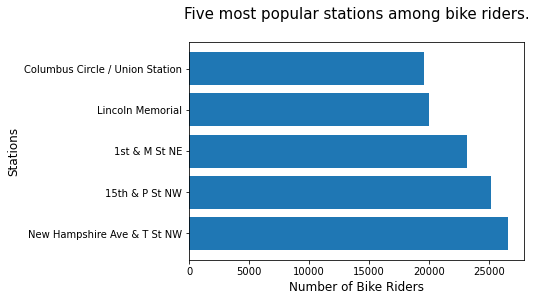

In [76]:
# Bar Chart showing top five most popular stations among bike riders.

top_station_index = top_station.index

plt.barh(y=top_station.index, width=top_station.values)

# Call function to add label and titles chart.
polish_chart(plt, 
             "Five most popular stations among bike riders.\n",
             "Number of Bike Riders",
             "Stations")


In [77]:
# Top five most unpopular stations.

unpopular_station = bike.departure_station.value_counts().tail()
unpopular_station

N Howard St & N Imboden St             4
S Jordan St & Venable St               4
6035 Warehouse                         3
W&OD Trail bridge & N Washington St    1
Fillmore & Bisdorf                     1
Name: departure_station, dtype: int64

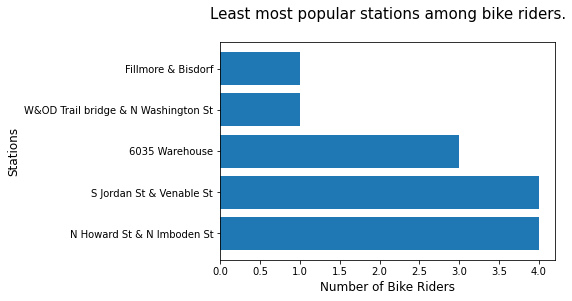

In [78]:
# Bar Charts showing top five most unpopular stations among bike riders.


plt.barh(y=unpopular_station.index, width=unpopular_station.values)

# Call function to add label and titles chart.
polish_chart(plt, 
             "Least most popular stations among bike riders.\n",
             "Number of Bike Riders",
             "Stations")

#### Observation:

 From the above charts, New Hampshire Ave & T St NW is the most popular station among bike riders. 
 
 
Fillmore & Bisdorf  and W&OD Trail bridge & N Washington St are the least popular station among bike riders. They both appeared once in the dataset.

Next, I will explore how bike riders ride in different periods of the day. I will find the most prefered period of the day bike riders ride and also the least.

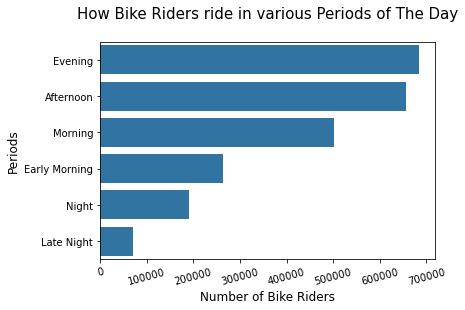

In [79]:
# How bike riders ride in different periods of the day.

session_index = bike.session.value_counts().index
sb.countplot(y="session", data=bike, color=base_color, order=session_index)

plt.xticks(rotation=15)

# Call function to add label and titles chart.
polish_chart(plt, 
             "How Bike Riders ride in various Periods of The Day\n",
             "Number of Bike Riders",
             "Periods")

#### Observation:
Bike riders  had the most rides in  the Evenings and Afternoons. With Evenings being the period with the most ride. While Nights and Late nights had the lowest rides with Late Night being the least.

Early mornings and mornings are more of an intermediate but had more rides than nights and late nights.
It makes sense that the least rides took place at night and late night because these are periods where people should generally be in bed.
It also make sense that there are most rides in the evenings because many are back from work at this period. But still, I cannot categorically tell that that's the reason most of the rides took place in the evening.

Next, I will find the months and days of the week with the least and most rides.

In [80]:
# Creating months and days of trips from started_at column.

month = bike.started_at.dt.month_name()
day =  bike.started_at.dt.day_name()

# Convert day to categorical data type.

order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_cat=pd.api.types.CategoricalDtype(ordered=True, categories=order_day)
day = day.astype(day_cat)

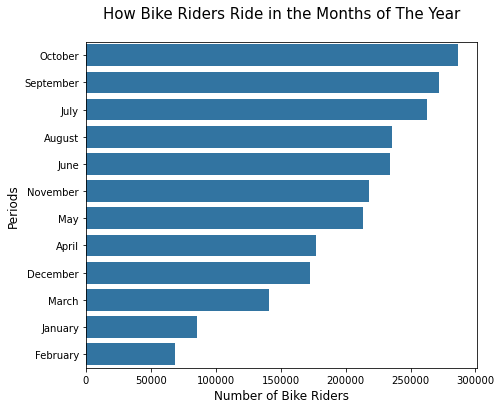

In [81]:
# Bar chart showing the the months of the year according to the number of total rides per month.

plt.figure(figsize=(7,6))
month_order = month.value_counts().index
sb.countplot(y=month, color=base_color, order=month_order)


# Call function to add label and titles chart.
polish_chart(plt, 
             "How Bike Riders Ride in the Months of The Year\n",
             "Number of Bike Riders",
             "Periods")

#### Observation:
From the bar chart, I found that the bike riders had the highest number of rides in October, September and July. With October being the month with the highest rides. It's closely followed by september. However, the  months with the least rides are  March, January and February. With February being the month with the least number of rides.


Next, I will move to the day of the week. I will find out how bike riders ride in each day of the week.

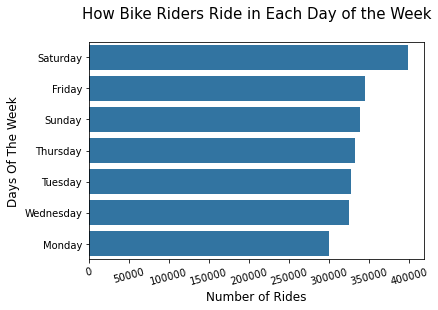

In [82]:
# Bar chart showing the days of the week according to the total rides per the particular day.

day_order = day.value_counts().index
sb.countplot(y=day, color=base_color, order=day_order)

plt.xticks(rotation=15)
# Call function to add label and titles chart.
polish_chart(plt, 
             "How Bike Riders Ride in Each Day of the Week\n",
             "Number of Rides",
             "Days Of The Week")


#### Observation:
From the chart above, I found that the bike riders ride  more on saturdays. Closely followed by Fridays.
Among the working days(Monday to Friday), I found that bike riders ride on fridays the least.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

After plotting the distance variable on a histogram, it has very large frequency values and the data is extremely skewed to the right. So I took a log transformation of the frequency axis. The information of the resulting chart was similar to the one without log transformation. Distance increased drastically up to around 2.5 kilometer and then took a deep dive in the form of a stair case down the chart. It shows a negative correlation with the frequency of appearance. The more the distance bike riders covered the lesser the number of the riders covering the distance.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When I plotted the distribution of the distance variable on a histogram, I found that there are distances that lies close to zero koilometer. So, I checked the dataset for trips less than 100 meter. I found about 9,000 records of such distance. By visually accessing the dataframe result, I found that the departure and destination station of such records are the same. It suggests that they might never leave the station however the duration of some of their trips were as high as 30 minutes and more.

I couldn't lay my hand on the weather dataset to explore the reason for this anomaly. So, I removed all records whose distances are less than 100 meter(0.1km) and all records with the same departure and destination stations. 


## Bivariate Exploration

First, I will explore the relationship between the numeric columns. I will use scatterplot to show the relationship of duration of trips in minute and distance covered in kilometer.


#### Note:

- To avoid over plotting, I will take a 400,000 sample records of the dataset. This 400,000 sample records will represent the 2.3 million total population.
- I will use this sample dataframe only in situations that require scatter plot and high processing power.

- Please, note that I will use the original dataset for taking the number of counts of data and in many other explorations.

In [83]:
# A sample of 100,000 data records.

bike_sample = bike.sample(400000)

In [84]:
# Distance sample.

distance_sample = bike.distance.sample(400000)

In [85]:
# Duration sample in minutes.

minute_sample = bike_sample.duration.dt.total_seconds() /60

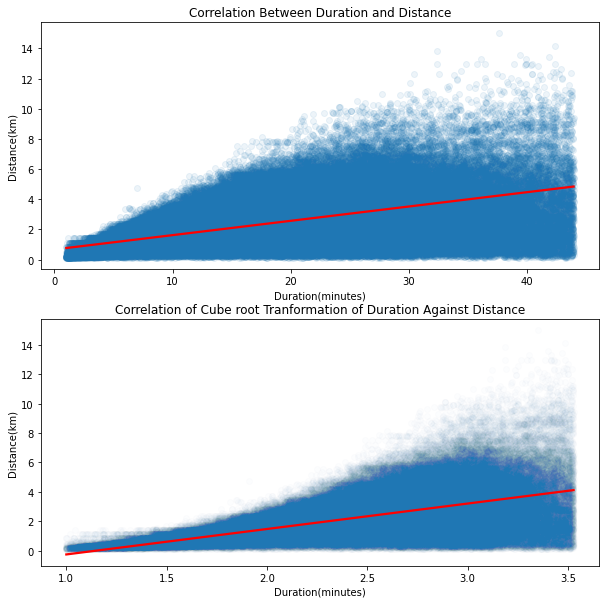

In [86]:
# Scatter plot showing the relationship betweeen distance covered by trips and total minutes spent in the trip.

fig, ax = plt.subplots(nrows=2, figsize=(10,10))

sb.regplot(data=bike_sample, x=minute_sample, y="distance", fit_reg=True, scatter_kws={"alpha":0.08}, line_kws={"color":"red"}, ax=ax[0])

#  cube root transformation of x- axis in  scatter plot showing the relationship 
# betweeen distance covered by trips and total minutes spent in the trip.
minute_sample_cbrt = np.cbrt(minute_sample)
sb.regplot(data=bike_sample, x=minute_sample_cbrt, y="distance", fit_reg=True, scatter_kws={"alpha":0.01}, line_kws={"color":"red"}, ax=ax[1])

ax[0].set_title("Correlation Between Duration and Distance")
ax[1].set_title("Correlation of Cube root Tranformation of Duration Against Distance")
ax[0].set_xlabel("Duration(minutes)")
ax[0].set_ylabel("Distance(km)")
ax[1].set_xlabel("Duration(minutes)")
ax[1].set_ylabel("Distance(km)")
plt.show()

####  Observation:

It appeared the distance increases with duration. The correlation is not too strong though. It's a weak positve correlation. I plot the cube root transformation of the x-axis on the second chart.

After taking the cube root transformation of the duration axis in the second chart. The scatter plot shows that their  is a better relationship between the  distance and duration.   An increase in the distance shows an increase in the duration though with a weak correlation.

Next, I will explore the categorical variables in the dataset. I will find how they relate with the two numerical variables in the dataset.

#### Note:

I will first check the average distance covered by each of the bike type among bike riders before I proceed to other variables.

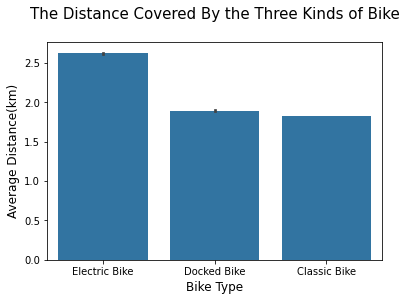

In [87]:
# The distance covered by the three bike types.

order = ["Electric Bike", "Docked Bike", "Classic Bike"]

sb.barplot(data=bike, x="bike_type", y="distance", order=order, color=base_color)


# Call function to add label and titles chart.
polish_chart(plt, 
             "The Distance Covered By the Three Kinds of Bike\n",
             "Bike Type",
             "Average Distance(km)")

#### Observation:
Electric bikes covered the highest distance. It covers a distance of around 2.7 kilometer on average.
While Classic bike covered the least distance. Although, only a bit lower than the distance covered by docked bike.
Remember that classic bike is the most prefered bike among bike riders. I will continue to explore the dataset to check if  I could find while it is the case. 

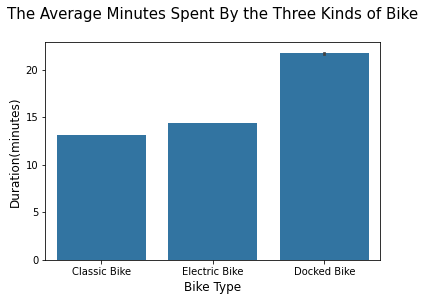

In [88]:
# Bar chart showing the average minutes spent by the three bike types.

sb.barplot(x="bike_type", y="time_spent", data=bike, color=base_color)

# Call function to add label and titles chart.
polish_chart(plt, 
             "The Average Minutes Spent By the Three Kinds of Bike\n",
             "Bike Type",
             "Duration(minutes)")

#### Observation:
From the above chart, I found that classic bikes were ridden around 12 minutes on average. That is almost half the minutes docked bikes were ridden. This supports the previous finding that classic bikes covered the least distance among the three bike types. It does make sense that if it covered the least distance, the least amount of time should also be spent during the trip all things being equal.

In the previous section, I found that classic bikes were driven the most by bike riders and docked bikes were driven the least. Now, I will explore deeper and  find the kind of bikes that were ridden by both groups of riders(suscribed member and casual riders) and see if it gives similar result as the former.

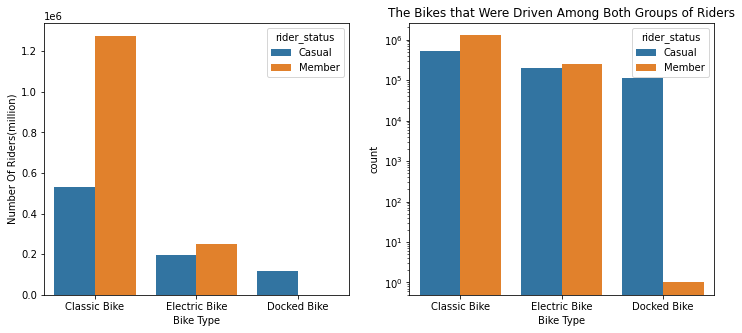

In [89]:
# Bar chart showing the bikes that were driven among both groups of riders.

fig, ax =plt.subplots(ncols=2, figsize=(12,5))


sb.countplot(data=bike, x="bike_type", hue="rider_status", ax=ax[0])


# Log transformation of bar chart showing the bikes that were driven among riders that are suscribed member and casual riders.

sb.countplot(data=bike, x="bike_type", hue="rider_status", ax=ax[1])

ax[1].set_title("The Bikes that Were Driven Among Both Groups of Riders")
ax[0].set_xlabel("Bike Type")
ax[0].set_ylabel("Number Of Riders(million)")
ax[1].set_yscale("log")
ax[1].set_xlabel("Bike Type")
plt.show()


#### Observation:
The first chart above further supports that classic bike is the most popular bikes among bike riders. 
Over 400,000 casual riders ride classic bike. And a much more number of suscribed members ride classic bike. 
An estimatae of 1.2 million riders ride classic bike. That's a very high number compared to only 200,000 suscribed members who ride electric cars.

Docked bike is prefered the least among both casual and suscribed members. In fact it appears no suscriber member rides docked bike. The chart at right hand side is a chart with the log transformation of the y-axis to enable me get a clearer details of the subsribed member riders that ride docked bikes. On plotting the chart, I find that only one rider ride the docked bike. The classic bike still remain the highest bike ridden for both casual and suscribed member.

In the following cell, I find the record of the only suscribed member who rode docked bike .

After that, I will explore the average minutes spent by both rider groups.

In [90]:
# Record of the only suscribed member who rode docked bike.

bike[bike.rider_status.str.contains("Member")  & bike.bike_type.str.contains("Docked Bike")]

,bike_type,rider_status,distance,duration,time_spent,session,started_at,ended_at,departure_station,destination_station
29405,Docked Bike,Member,1.175205,0 days 00:04:50,4.833333,Morning,2021-01-13 11:02:24,2021-01-13 11:07:14,11th & O St NW,New York Ave & 15th St NW


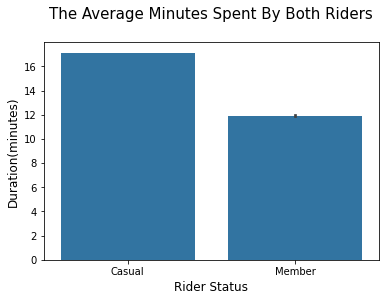

In [91]:
# Bar chart showing the average minutes spent by both rider groups.

sb.barplot(data=bike, x="rider_status", y="time_spent", color=base_color)
plt.xlabel("Rider Status")
plt.ylabel("Duration(minutes)")

# Call function to add label and titles chart.
polish_chart(plt, 
             "The Average Minutes Spent By Both Riders\n",
             "Rider Status",
             "Duration(minutes)")

#### Observation:
From the chart above, I found that casual riders spent the most minutes on average on their trip. Casual riders spent an average of 17 minutes on their trip while suscribed members spent an average of 11 minutes on their trip.

Next, I will find the explore the average distance covered by bike riders in each period of the day.

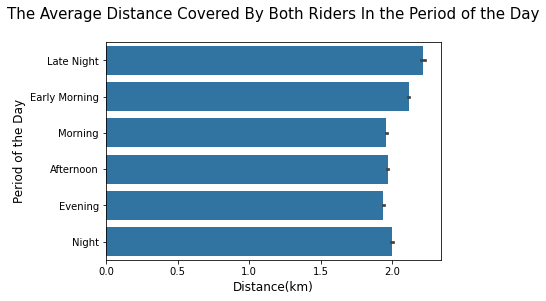

In [92]:
# Bar chart showing the average distance covered by bike riders in each period of the day.

sb.barplot(data=bike, y="session", x="distance", color=base_color)

# Call function to add label and titles chart.
polish_chart(plt, 
             "The Average Distance Covered By Both Riders In the Period of the Day\n",
             "Distance(km)",
             "Period of the Day")
plt.show()

#### Observation:
The chart above shows that bike riders who rode at early morning and at late night travelled more distance than bike riders who rode than any other bike riders who rode at other periods of the day.
Those who rode at late night rode far the most.


Overall, There is no much difference among bike riders that rode in the morning,  afternoon and evening period. In fact, the distance covered in both morning and afternoon appeared to be the same.

Next, I will explore how much both groups of riders ride in each months of the year, days of the weeks and periods of the day.

In [93]:
bike.rider_status.dtype

dtype('O')

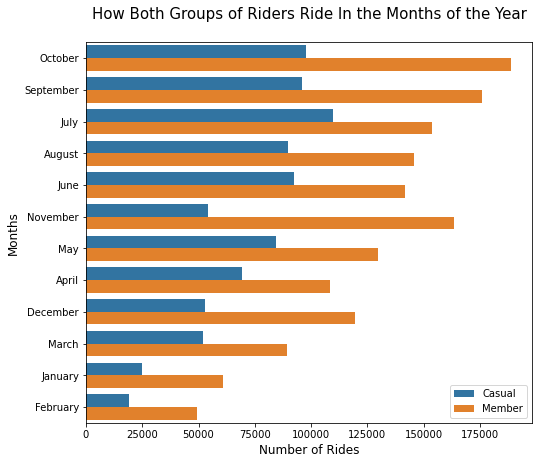

In [94]:
# Bar Chart showing how much both groups of riders ride in each months of the year

plt.figure(figsize=(8,7))
sb.countplot(data=bike, y=month, hue="rider_status", order=month_order)

plt.legend()
# Call function to add label and titles chart.
polish_chart(plt, 
             "How Both Groups of Riders Ride In the Months of the Year\n",
             "Number of Rides",
             "Months")



#### Observation:

The casual riders had the highest number of rides in the month of july. They also had the least number of rides in the month of February.
The suscribed member had the highest number of rides in the month of october. Like the casual riders, they also got the least ride in february. This finding support the previous finding that the least ride happened in february and the highest happened in october.

Since the number of suscribed member riders in the dataset is almost twice as much as the number of casual member. It's not surprising to see from this chart that suscribed members had the highest number of rides in the entire year.

Next,  I will explore how both group of riders ride in each day of the week.


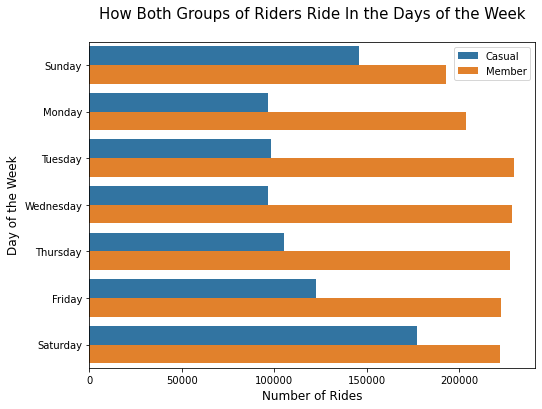

In [95]:
# Bar chart showing how both group of riders ride in each day of the week.

plt.figure(figsize=(8,6))
sb.countplot(data=bike, y=day, hue="rider_status")


plt.legend()
# Call function to add label and titles chart.
polish_chart(plt, 
             "How Both Groups of Riders Ride In the Days of the Week\n",
             "Number of Rides",
             "Day of the Week")




#### Observation:

In the chart above, I found that both  causal and suscribed member riders have the highest number of rides on saturday.
Suscribed members have the least rides on sunday while casual riders have the least rides on Monday, Tuesday and Wednesday.

This also support the result of previous findings that most rides were taken on saturday.

Next,  I will explore how both group of riders ride in different periods of the day.

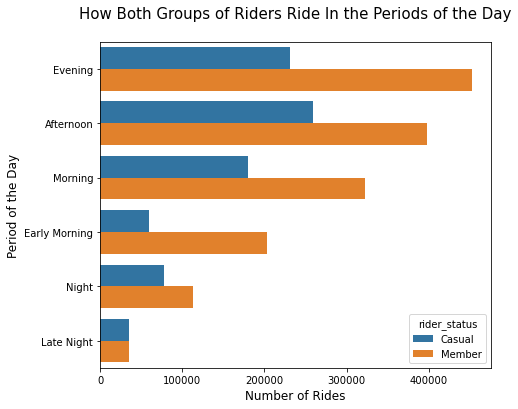

In [96]:
# I will explore how both group of riders ride in different periods of the day.

plt.figure(figsize=(7,6))
sb.countplot(data=bike, y="session", hue="rider_status", order=session_index)

# Call function to add label and titles chart.
polish_chart(plt, 
             "How Both Groups of Riders Ride In the Periods of the Day\n",
             "Number of Rides",
             "Period of the Day")
plt.show()

#### Observation:

From the above chart, I found that the casual riders had the highest number of rides in afternoon period while they had the least rides at late night.

Suscribed members had the highest number of rides in the evening and the lowest rides at late night.

From the chart, both casual riders and suscribed riders have the same number of rides at late night.

This finding confirms the previous finding that the least number of rides occured at late night and the highest at evening.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

After plotting distance covered and time spent on the rides on scatter plot to see the relationship between both variables, the result was a very weak relationship. Then, I took the cube root transformation of the duration to see if I could get more details. The result gave a better insight. The correlation between duration and distance was more obvious. It's a positive correlation though a weak one but more obvious than the chart without the cube root transformation.

I found that among the two rider groups, the casual riders spent the most minutes on average on their trips than the suscribed members.

Among the three kinds of bikes driven by bike riders, docked bike was driven longer in terms of time spent on trips than any other bike. Classic bikes were driven the least amount of time than any other bikes.

Electric bikes covered the most distance while classic bikes covered the least distance.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I found that both  casual and suscribed member riders had the highest number of rides on saturdays.
Suscribed members had the least rides on sunday while casual riders had the least rides on Monday, Tuesday and Wednesday.
I also found that the casual riders had the highest number of rides in afternoon period while they had the least rides in late night. 
Lastly, the suscribed member had the highest number of rides in the month of october. Like the casual riders, they also got the least ride in february.


## Multivairate  Exploration

THe points of focus in this exploration is to find how the categorical data relates to one another and also relate to the distance and time spent on trips by both bike rider groups.

<Figure size 720x648 with 0 Axes>

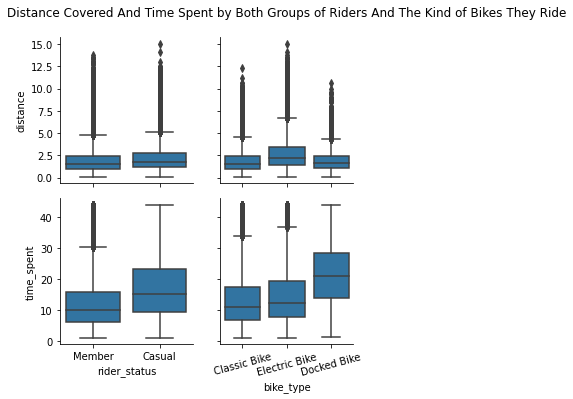

In [97]:
# Boxplot showing the statistical levels of the numerical variables with the categorical variables.

plt.figure(figsize=(10,9))
g = sb.PairGrid(data=bike_sample, y_vars=["distance", "time_spent" ], x_vars= ["rider_status", "bike_type"])
g.map(sb.boxplot, color=base_color)
plt.xticks(rotation=15)
ax = g.axes.flatten()
ax[1].set_title("Distance Covered And Time Spent by Both Groups of Riders And The Kind of Bikes They Ride\n")
plt.show()

#### Observation:
The median of the distance covered  by the casual rider is a slightly higher than that of suscribed member counterpart.

The median of the time spent by the casual riders is a significantly higher than that of suscribed member counterpart.


Electric bikes covered more distance than any other bike. This is obvious as the median distance is higher than that of classic bikes and docked bikes.

Docked bikes rider spent the most minutes in the trip than any both electric  and classic bike  riders.


All these results corroborate the previous findings. It shows that with a cleaned dataset, one could arrive at similar result for both median and average statistical estimation.

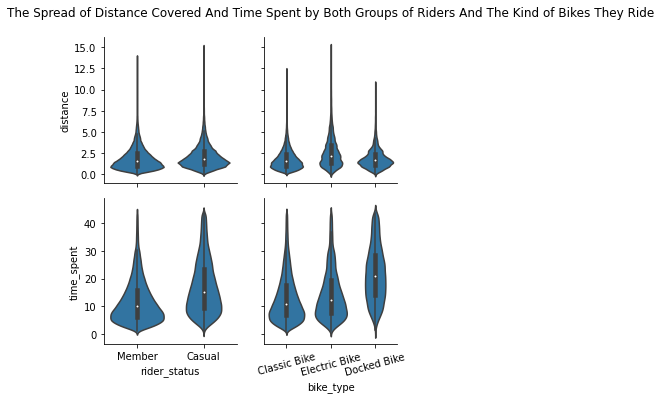

In [98]:
# violinplot showing the distribution of the numerical variables against the categorical variables.

g = sb.PairGrid(data=bike_sample, y_vars=["distance", "time_spent"], x_vars=["rider_status", "bike_type"])
g.map(sb.violinplot, color=base_color)
plt.xticks(rotation=15)
ax = g.axes.flatten()
ax[1].set_title("The Spread of Distance Covered And Time Spent by Both Groups of Riders And The Kind of Bikes They Ride\n")
plt.show()

#### Observation:

These violin plot is similar to the boxplot in previous visualisation. The difference is that the violin plot gives more insight as regards the spread of the data.

Docked bike and casual riders shows a large spread of data with the time spent during their trips.
Electric and Docked bikes have their data evenly spread along the time spent on their trips.


Both causal and suscribed members covered low distance than they cover high distance. 
However, causal riders spent more time in ther trips than  suscribed members.



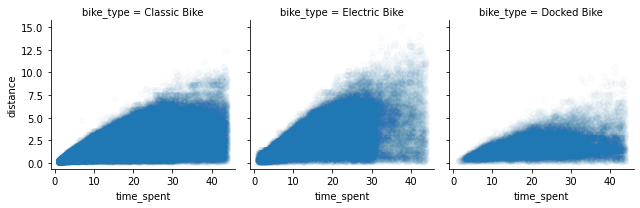

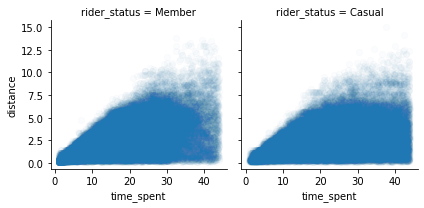

In [99]:
# Scatter plot showing the correlation of distance and duration for both the bike_type and rider_status.

column = ["bike_type", "rider_status"]
for col in column:
    g = sb.FacetGrid(data=bike_sample, col=col)
    g.map(sb.regplot, "time_spent", "distance", fit_reg=False, scatter_kws={"alpha":0.02}, line_kws={"color":"red"})
    
plt.show()

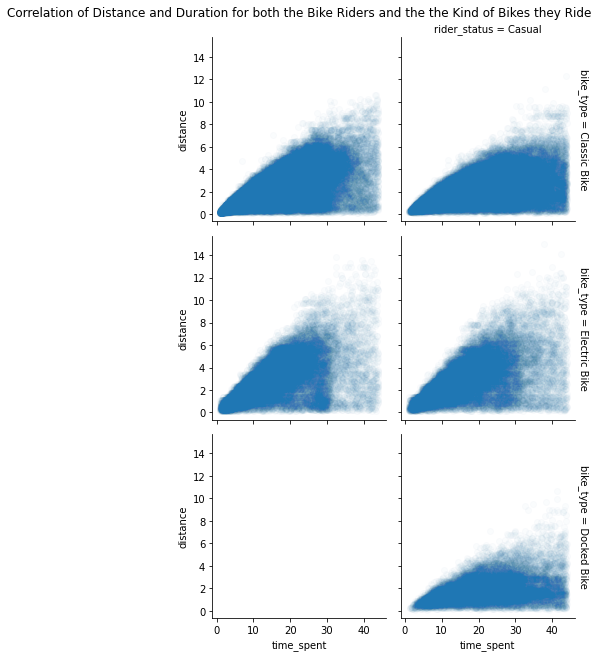

In [100]:
# Scatter plot showing the correlation of distance and duration grouped by the bike_type and rider_status.

g = sb.FacetGrid(data=bike_sample, col="rider_status", row="bike_type", margin_titles=True)
g.map(sb.regplot, "time_spent", "distance", fit_reg=False, scatter_kws={"alpha":0.02}, line_kws={"color":"red"})
ax = g.axes.flatten()
ax[0].set_title("Correlation of Distance and Duration for both the Bike Riders and the the Kind of Bikes they Ride\n")
plt.show()

#### Observation:

Both groups of bike riders together with the kind of bike they ride shows similar relationship with one another.
As the distance increase, the duration also weakly increases. A weak relationship nonetheless.

An exception is the last plot for suscribed member where there appears to be an empty plot. The suscribed member groups who ride docked bikes has only one value. This was found previously in the last session that there is no more than 1 suscribed member who ride docked bike.

This means suscribed members are not a fan of docked bikes.

Next, I will explore the average distance covered by the three groups of bike riders according to kind of bikes they ride at various period of the day

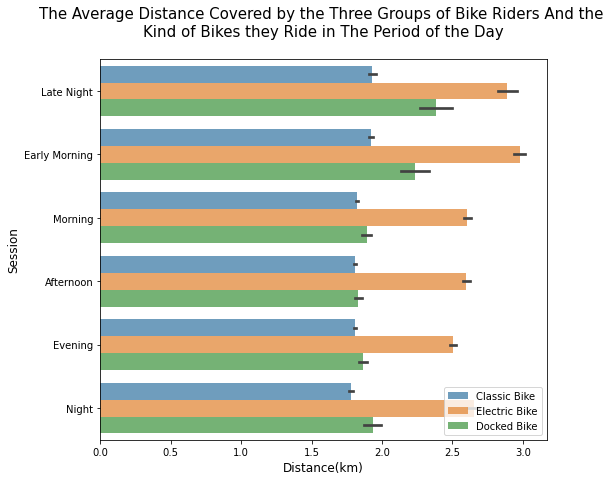

In [101]:
# Bar chart showing the average distance covered by the three groups of bike riders according to the
# kind of bikes they ride at various period of the day

plt.figure(figsize=(8,7))
sb.barplot(data=bike_sample, y="session", x="distance", hue="bike_type", alpha=0.7)

# Call function to add label and titles chart.
plt.legend(loc= 4)
polish_chart(plt, 
             "The Average Distance Covered by the Three Groups of Bike Riders And the \nKind of Bikes they Ride in The Period of the Day\n",
             "Distance(km)",
             "Session")



#### Observation:
From the chart above, The electric bike covered the most distance, followed by the classic bike. The least distance was covered by riders who ride docked bike.

I found that the average distance covered by the three kinds of bikes are similar to one another in periods such as mornings, afternoon, evening and  night. They are also similar for both late night and early mornings.

The highest distance was covered by the bikes at late night, closely followed by early morning.

This findings also confirm the findings discovered in previous sections about the distance covered in periods of the day.

Next, I will find the average distance  covered by the bike riders who rode the three kinds of bikes in each month of the year.

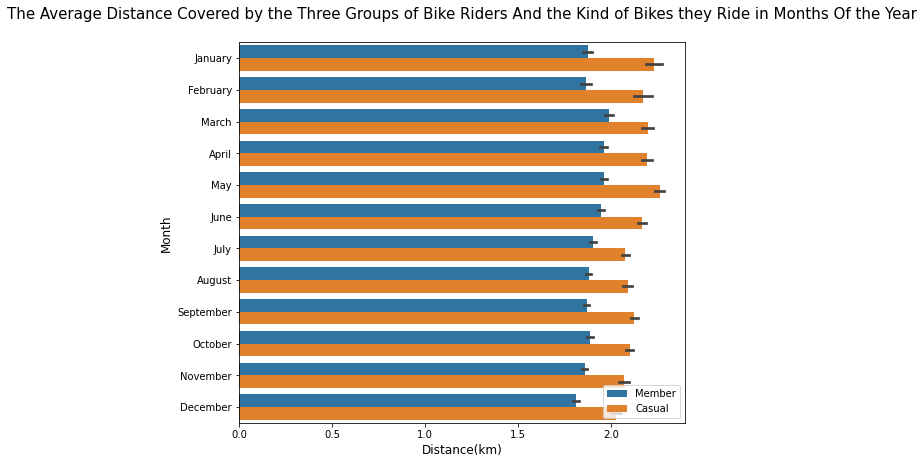

In [102]:

# Bar chart showing the average distance  covered by the bike riders who rode 
# the three kinds of bikes in each month of the year.

plt.figure(figsize=(8,7))
sb.barplot(data=bike_sample, y=month, x="distance", hue="rider_status")
plt.legend(loc=4)
polish_chart(plt, 
             "The Average Distance Covered by the Three Groups of Bike Riders And the Kind of Bikes they Ride in Months Of the Year\n",
             "Distance(km)",
             "Month")

#### Observation:

Similar to the findings of previous section, from the chart above, I found that casual riders covered the highest distance.
Their distance peaked in may and they had the least in december. However, the suscribed member had their highest distance in may and the lowest in december.


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I was able to know precisely the kind of bikes the three groups of bike riders ride and the distance they covered in various periods of the day. This information was hidden in the previous sections

I found that the average distance covered by the three kinds of bikes are similar to one another in periods such as mornings, afternoon, evening and  night. 
They are also similar for both late night and early mornings. This information was hidden in the previous sections.


### Were there any interesting or surprising interactions between features?

It's interesting to know that various categorical variables maintain their relationship with the dependent variables even as I explored deeper with more variables.
For instance, in the previous section, I found that bike riders who ride electric bikes covered the highest distance and those that ride classic bike covered the least distance. On exploring deeper in this section to know their relationship with various periods of the day, I found that Electric bikes still covered the highest distance but now in the evening period. While classic bikes covered the least distance but now in the night.

In [103]:
# Reset index and read the cleaned bike dataset to csv for part 2 
bike.reset_index(drop=True, inplace=True)
bike.to_csv("bike.csv", index=False)